We are interested in analyzing how the choice of the Dirichlet parameter(s) $\gamma$ affect the convergence of the Neal version of the Gibbs sampler, in particular the batched one, comparing it to the deterministic assignment probabilities version. 
Main questions are: 
- can $\gamma$ influence the speed of convergence?
- can $\gamma$ lead to a different stationary distribution? I.E.: could it be that for some values of $\gamma$ the algorithm converges to the "true" assignments, and for some others it leads to the prior?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from sbm_class import *
from neal_batched import *
from neal_sequential import *
from batched import *
from sequential import *
from metrics import *

## Convergence

Let us focus on understanding if the speed of convergence is affected by $\gamma$.
In order to do so, we run the samplers $N$ times on the network.
On each, we run the "deterministic" sampler and the Neal samplers (all batched) for increasing values of $\gamma$.
For now, we retain symmetry.

Then, we plot the histogram-trace-plot of the loss for each value of $\gamma$ across iterations. Notice that the deterministic case can be seen as the limit case for $\gamma\rightarrow\infty$ of the Neal version.


In [3]:
# initialization parameter
alpha = 0.3
# set parameters for the network
n = 400
k = 4
p = 0.17
q = 0.08
# set parameters for the samplers
n_iter = 100
burn_in = 0

alpha_p = 1
beta_p = 1
alpha_q = 1
beta_q = 1

# changing parameters
pi = np.ones(k) # deterministic prior
gamma_list = [0, 0.1, 1, 10, 10000, 1000000]

# seed
np.random.seed(0)

# number of runs 
N = 20

In [4]:
# generate the network
sbm = Homogeneous_SBM(n, k, p, q, Neal=False)
A = sbm.get_A()
z = sbm.get_z()
# warm initialization
z_init = warm_initializer(z, alpha, n, k)

# loss(z_init, z)

In [5]:
# for N iterations, run all samplers (batched and Neal batched with the different values of gamma)
# and store in a dataframe all the label at each iteration
p_list = np.zeros((len(gamma_list)+1, N, n_iter))
q_list = np.zeros((len(gamma_list)+1, N, n_iter))
loss_list =  np.zeros((len(gamma_list)+1, N, n_iter))

for iter in range(1, N+1):
    print("Deterministic prior, iteration ", iter)
    sampler = batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, pi_pri = pi)
    sampler.run(n_iter, burn_in)
    z_list_batched = sampler.get_z_list()
    losses_batched = [loss(z, z_list_batched[i])[0] for i in range(n_iter)]
    loss_list[0, iter-1, :] = losses_batched
    p_list[0, iter-1, :] = sampler.get_p_list()
    q_list[0, iter-1, :] = sampler.get_q_list()

for j, gamma in enumerate(gamma_list):
    for iter in range(1, N+1):
        print("Gamma = ", gamma, ", iteration ", iter)
        sampler = Neal_batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, gamma = gamma)
        sampler.run(n_iter, burn_in)
        z_list = sampler.get_z_list()
        losses = [loss(z, z_list[i])[0] for i in range(n_iter)]
        loss_list[j+1, iter-1, :] = losses
        p_list[j+1, iter-1, :] = sampler.get_p_list()
        q_list[j+1, iter-1, :] = sampler.get_q_list()


Deterministic prior, iteration  1


100%|██████████| 100/100 [00:01<00:00, 96.98it/s]


Deterministic prior, iteration  2


100%|██████████| 100/100 [00:00<00:00, 100.06it/s]


Deterministic prior, iteration  3


100%|██████████| 100/100 [00:00<00:00, 115.26it/s]


Deterministic prior, iteration  4


100%|██████████| 100/100 [00:00<00:00, 120.38it/s]


Deterministic prior, iteration  5


100%|██████████| 100/100 [00:01<00:00, 98.52it/s]


Deterministic prior, iteration  6


100%|██████████| 100/100 [00:01<00:00, 90.69it/s]


Deterministic prior, iteration  7


100%|██████████| 100/100 [00:00<00:00, 118.28it/s]


Deterministic prior, iteration  8


100%|██████████| 100/100 [00:01<00:00, 98.48it/s]


Deterministic prior, iteration  9


100%|██████████| 100/100 [00:00<00:00, 100.53it/s]


Deterministic prior, iteration  10


100%|██████████| 100/100 [00:01<00:00, 96.56it/s]


Deterministic prior, iteration  11


100%|██████████| 100/100 [00:01<00:00, 97.14it/s]


Deterministic prior, iteration  12


100%|██████████| 100/100 [00:00<00:00, 124.77it/s]


Deterministic prior, iteration  13


100%|██████████| 100/100 [00:01<00:00, 99.37it/s]


Deterministic prior, iteration  14


100%|██████████| 100/100 [00:00<00:00, 124.03it/s]


Deterministic prior, iteration  15


100%|██████████| 100/100 [00:00<00:00, 124.53it/s]


Deterministic prior, iteration  16


100%|██████████| 100/100 [00:00<00:00, 122.65it/s]


Deterministic prior, iteration  17


100%|██████████| 100/100 [00:00<00:00, 120.82it/s]


Deterministic prior, iteration  18


100%|██████████| 100/100 [00:00<00:00, 124.36it/s]


Deterministic prior, iteration  19


100%|██████████| 100/100 [00:00<00:00, 118.15it/s]


Deterministic prior, iteration  20


100%|██████████| 100/100 [00:00<00:00, 127.28it/s]


Gamma =  0 , iteration  1


100%|██████████| 100/100 [00:00<00:00, 117.96it/s]


Gamma =  0 , iteration  2


100%|██████████| 100/100 [00:00<00:00, 117.03it/s]


Gamma =  0 , iteration  3


 65%|██████▌   | 65/100 [00:00<00:00, 122.45it/s]g:\Il mio Drive\Unito\Tesi\Codice\Tidy\Batched-Gibbs-Sampling-for-Community-Detection-in-SBM\neal_batched.py:159: RuntimeWarning: divide by zero encountered in log
  self.z = np.argmax(np.log(self.pi) + rnd.gumbel(size=self.pi.shape), axis=1)
100%|██████████| 100/100 [00:00<00:00, 118.50it/s]


Gamma =  0 , iteration  4


100%|██████████| 100/100 [00:00<00:00, 118.85it/s]


Gamma =  0 , iteration  5


100%|██████████| 100/100 [00:00<00:00, 116.43it/s]


Gamma =  0 , iteration  6


100%|██████████| 100/100 [00:00<00:00, 111.09it/s]


Gamma =  0 , iteration  7


100%|██████████| 100/100 [00:00<00:00, 117.83it/s]


Gamma =  0 , iteration  8


100%|██████████| 100/100 [00:00<00:00, 117.63it/s]


Gamma =  0 , iteration  9


100%|██████████| 100/100 [00:00<00:00, 119.85it/s]


Gamma =  0 , iteration  10


100%|██████████| 100/100 [00:00<00:00, 115.37it/s]


Gamma =  0 , iteration  11


100%|██████████| 100/100 [00:00<00:00, 119.94it/s]


Gamma =  0 , iteration  12


100%|██████████| 100/100 [00:00<00:00, 119.84it/s]


Gamma =  0 , iteration  13


100%|██████████| 100/100 [00:00<00:00, 119.98it/s]


Gamma =  0 , iteration  14


100%|██████████| 100/100 [00:00<00:00, 110.83it/s]


Gamma =  0 , iteration  15


100%|██████████| 100/100 [00:00<00:00, 118.15it/s]


Gamma =  0 , iteration  16


100%|██████████| 100/100 [00:00<00:00, 122.42it/s]


Gamma =  0 , iteration  17


100%|██████████| 100/100 [00:00<00:00, 117.61it/s]


Gamma =  0 , iteration  18


100%|██████████| 100/100 [00:00<00:00, 117.58it/s]


Gamma =  0 , iteration  19


100%|██████████| 100/100 [00:00<00:00, 120.61it/s]


Gamma =  0 , iteration  20


100%|██████████| 100/100 [00:00<00:00, 117.64it/s]


Gamma =  0.1 , iteration  1


100%|██████████| 100/100 [00:00<00:00, 109.05it/s]


Gamma =  0.1 , iteration  2


100%|██████████| 100/100 [00:00<00:00, 117.71it/s]


Gamma =  0.1 , iteration  3


100%|██████████| 100/100 [00:00<00:00, 120.68it/s]


Gamma =  0.1 , iteration  4


100%|██████████| 100/100 [00:00<00:00, 117.63it/s]


Gamma =  0.1 , iteration  5


100%|██████████| 100/100 [00:00<00:00, 117.58it/s]


Gamma =  0.1 , iteration  6


100%|██████████| 100/100 [00:00<00:00, 122.45it/s]


Gamma =  0.1 , iteration  7


100%|██████████| 100/100 [00:00<00:00, 119.95it/s]


Gamma =  0.1 , iteration  8


100%|██████████| 100/100 [00:00<00:00, 109.07it/s]


Gamma =  0.1 , iteration  9


100%|██████████| 100/100 [00:00<00:00, 122.37it/s]


Gamma =  0.1 , iteration  10


100%|██████████| 100/100 [00:00<00:00, 120.98it/s]


Gamma =  0.1 , iteration  11


100%|██████████| 100/100 [00:00<00:00, 119.98it/s]


Gamma =  0.1 , iteration  12


100%|██████████| 100/100 [00:00<00:00, 122.46it/s]


Gamma =  0.1 , iteration  13


100%|██████████| 100/100 [00:00<00:00, 122.99it/s]


Gamma =  0.1 , iteration  14


100%|██████████| 100/100 [00:00<00:00, 119.99it/s]


Gamma =  0.1 , iteration  15


100%|██████████| 100/100 [00:00<00:00, 119.95it/s]


Gamma =  0.1 , iteration  16


100%|██████████| 100/100 [00:00<00:00, 111.05it/s]


Gamma =  0.1 , iteration  17


100%|██████████| 100/100 [00:00<00:00, 120.38it/s]


Gamma =  0.1 , iteration  18


100%|██████████| 100/100 [00:00<00:00, 120.82it/s]


Gamma =  0.1 , iteration  19


100%|██████████| 100/100 [00:00<00:00, 117.62it/s]


Gamma =  0.1 , iteration  20


100%|██████████| 100/100 [00:00<00:00, 121.98it/s]


Gamma =  1 , iteration  1


100%|██████████| 100/100 [00:00<00:00, 120.00it/s]


Gamma =  1 , iteration  2


100%|██████████| 100/100 [00:00<00:00, 118.30it/s]


Gamma =  1 , iteration  3


100%|██████████| 100/100 [00:00<00:00, 110.11it/s]


Gamma =  1 , iteration  4


100%|██████████| 100/100 [00:00<00:00, 117.60it/s]


Gamma =  1 , iteration  5


100%|██████████| 100/100 [00:00<00:00, 119.98it/s]


Gamma =  1 , iteration  6


100%|██████████| 100/100 [00:00<00:00, 123.02it/s]


Gamma =  1 , iteration  7


100%|██████████| 100/100 [00:00<00:00, 119.98it/s]


Gamma =  1 , iteration  8


100%|██████████| 100/100 [00:00<00:00, 119.99it/s]


Gamma =  1 , iteration  9


100%|██████████| 100/100 [00:00<00:00, 115.57it/s]


Gamma =  1 , iteration  10


100%|██████████| 100/100 [00:00<00:00, 109.06it/s]


Gamma =  1 , iteration  11


100%|██████████| 100/100 [00:00<00:00, 119.94it/s]


Gamma =  1 , iteration  12


100%|██████████| 100/100 [00:00<00:00, 122.26it/s]


Gamma =  1 , iteration  13


100%|██████████| 100/100 [00:00<00:00, 117.65it/s]


Gamma =  1 , iteration  14


100%|██████████| 100/100 [00:00<00:00, 116.07it/s]


Gamma =  1 , iteration  15


100%|██████████| 100/100 [00:00<00:00, 119.75it/s]


Gamma =  1 , iteration  16


100%|██████████| 100/100 [00:00<00:00, 117.64it/s]


Gamma =  1 , iteration  17


100%|██████████| 100/100 [00:00<00:00, 111.10it/s]


Gamma =  1 , iteration  18


100%|██████████| 100/100 [00:00<00:00, 119.99it/s]


Gamma =  1 , iteration  19


100%|██████████| 100/100 [00:00<00:00, 115.43it/s]


Gamma =  1 , iteration  20


100%|██████████| 100/100 [00:00<00:00, 120.00it/s]


Gamma =  10 , iteration  1


100%|██████████| 100/100 [00:00<00:00, 122.47it/s]


Gamma =  10 , iteration  2


100%|██████████| 100/100 [00:00<00:00, 119.95it/s]


Gamma =  10 , iteration  3


100%|██████████| 100/100 [00:00<00:00, 122.41it/s]


Gamma =  10 , iteration  4


100%|██████████| 100/100 [00:00<00:00, 107.60it/s]


Gamma =  10 , iteration  5


100%|██████████| 100/100 [00:00<00:00, 119.95it/s]


Gamma =  10 , iteration  6


100%|██████████| 100/100 [00:00<00:00, 117.65it/s]


Gamma =  10 , iteration  7


100%|██████████| 100/100 [00:00<00:00, 119.96it/s]


Gamma =  10 , iteration  8


100%|██████████| 100/100 [00:00<00:00, 119.96it/s]


Gamma =  10 , iteration  9


100%|██████████| 100/100 [00:00<00:00, 119.98it/s]


Gamma =  10 , iteration  10


100%|██████████| 100/100 [00:00<00:00, 119.99it/s]


Gamma =  10 , iteration  11


100%|██████████| 100/100 [00:00<00:00, 122.20it/s]


Gamma =  10 , iteration  12


100%|██████████| 100/100 [00:00<00:00, 120.51it/s]


Gamma =  10 , iteration  13


100%|██████████| 100/100 [00:00<00:00, 117.27it/s]


Gamma =  10 , iteration  14


100%|██████████| 100/100 [00:00<00:00, 122.42it/s]


Gamma =  10 , iteration  15


100%|██████████| 100/100 [00:00<00:00, 119.97it/s]


Gamma =  10 , iteration  16


100%|██████████| 100/100 [00:00<00:00, 119.98it/s]


Gamma =  10 , iteration  17


100%|██████████| 100/100 [00:00<00:00, 122.32it/s]


Gamma =  10 , iteration  18


100%|██████████| 100/100 [00:00<00:00, 109.08it/s]


Gamma =  10 , iteration  19


100%|██████████| 100/100 [00:00<00:00, 120.08it/s]


Gamma =  10 , iteration  20


100%|██████████| 100/100 [00:00<00:00, 119.97it/s]


Gamma =  10000 , iteration  1


100%|██████████| 100/100 [00:00<00:00, 119.98it/s]


Gamma =  10000 , iteration  2


100%|██████████| 100/100 [00:00<00:00, 117.61it/s]


Gamma =  10000 , iteration  3


100%|██████████| 100/100 [00:00<00:00, 119.81it/s]


Gamma =  10000 , iteration  4


100%|██████████| 100/100 [00:00<00:00, 120.22it/s]


Gamma =  10000 , iteration  5


100%|██████████| 100/100 [00:00<00:00, 122.41it/s]


Gamma =  10000 , iteration  6


100%|██████████| 100/100 [00:00<00:00, 110.97it/s]


Gamma =  10000 , iteration  7


100%|██████████| 100/100 [00:00<00:00, 119.76it/s]


Gamma =  10000 , iteration  8


100%|██████████| 100/100 [00:00<00:00, 117.63it/s]


Gamma =  10000 , iteration  9


100%|██████████| 100/100 [00:00<00:00, 122.35it/s]


Gamma =  10000 , iteration  10


100%|██████████| 100/100 [00:00<00:00, 119.96it/s]


Gamma =  10000 , iteration  11


100%|██████████| 100/100 [00:00<00:00, 120.06it/s]


Gamma =  10000 , iteration  12


100%|██████████| 100/100 [00:00<00:00, 122.40it/s]


Gamma =  10000 , iteration  13


100%|██████████| 100/100 [00:00<00:00, 109.10it/s]


Gamma =  10000 , iteration  14


100%|██████████| 100/100 [00:00<00:00, 119.27it/s]


Gamma =  10000 , iteration  15


100%|██████████| 100/100 [00:00<00:00, 120.05it/s]


Gamma =  10000 , iteration  16


100%|██████████| 100/100 [00:00<00:00, 119.92it/s]


Gamma =  10000 , iteration  17


100%|██████████| 100/100 [00:00<00:00, 122.27it/s]


Gamma =  10000 , iteration  18


100%|██████████| 100/100 [00:00<00:00, 119.99it/s]


Gamma =  10000 , iteration  19


100%|██████████| 100/100 [00:00<00:00, 119.45it/s]


Gamma =  10000 , iteration  20


100%|██████████| 100/100 [00:00<00:00, 119.97it/s]


Gamma =  1000000 , iteration  1


100%|██████████| 100/100 [00:00<00:00, 119.97it/s]


Gamma =  1000000 , iteration  2


100%|██████████| 100/100 [00:00<00:00, 119.93it/s]


Gamma =  1000000 , iteration  3


100%|██████████| 100/100 [00:00<00:00, 117.64it/s]


Gamma =  1000000 , iteration  4


100%|██████████| 100/100 [00:00<00:00, 117.62it/s]


Gamma =  1000000 , iteration  5


100%|██████████| 100/100 [00:00<00:00, 117.65it/s]


Gamma =  1000000 , iteration  6


100%|██████████| 100/100 [00:00<00:00, 119.43it/s]


Gamma =  1000000 , iteration  7


100%|██████████| 100/100 [00:00<00:00, 120.07it/s]


Gamma =  1000000 , iteration  8


100%|██████████| 100/100 [00:00<00:00, 119.86it/s]


Gamma =  1000000 , iteration  9


100%|██████████| 100/100 [00:00<00:00, 120.09it/s]


Gamma =  1000000 , iteration  10


100%|██████████| 100/100 [00:00<00:00, 119.25it/s]


Gamma =  1000000 , iteration  11


100%|██████████| 100/100 [00:00<00:00, 119.96it/s]


Gamma =  1000000 , iteration  12


100%|██████████| 100/100 [00:00<00:00, 116.86it/s]


Gamma =  1000000 , iteration  13


100%|██████████| 100/100 [00:00<00:00, 120.01it/s]


Gamma =  1000000 , iteration  14


100%|██████████| 100/100 [00:00<00:00, 117.63it/s]


Gamma =  1000000 , iteration  15


100%|██████████| 100/100 [00:00<00:00, 108.71it/s]


Gamma =  1000000 , iteration  16


100%|██████████| 100/100 [00:00<00:00, 120.00it/s]


Gamma =  1000000 , iteration  17


100%|██████████| 100/100 [00:00<00:00, 117.64it/s]


Gamma =  1000000 , iteration  18


100%|██████████| 100/100 [00:00<00:00, 116.88it/s]


Gamma =  1000000 , iteration  19


100%|██████████| 100/100 [00:00<00:00, 117.60it/s]


Gamma =  1000000 , iteration  20


100%|██████████| 100/100 [00:00<00:00, 117.64it/s]


**Summary of findings:**

For "strong recovery" cases we observe convergence regardless, no particular influence for $\gamma$.

If we consider networks where the algorithm can fail and we set the "warmth" just below the recovery, we observe an influence of $\gamma$.



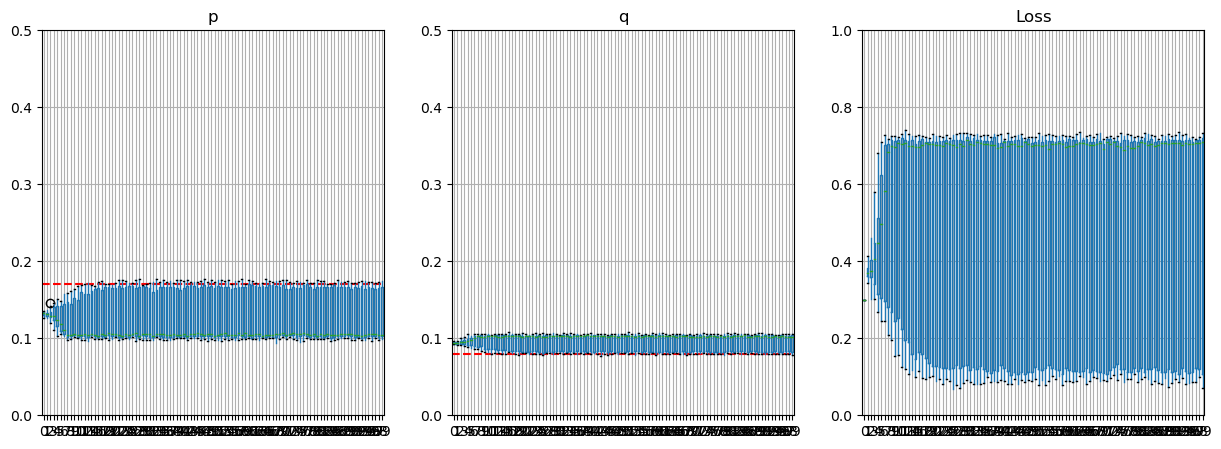

Gamma:  0


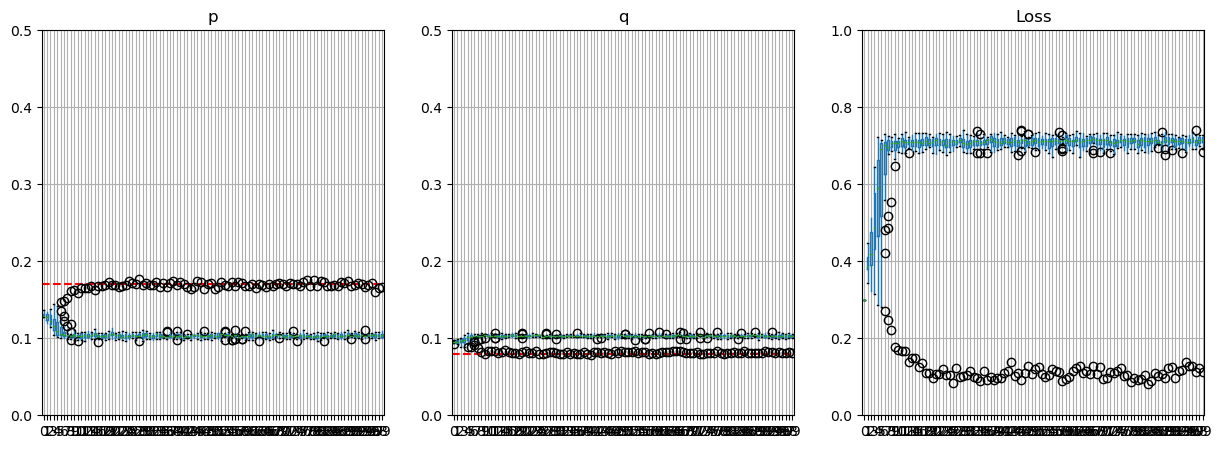

Gamma:  0.1


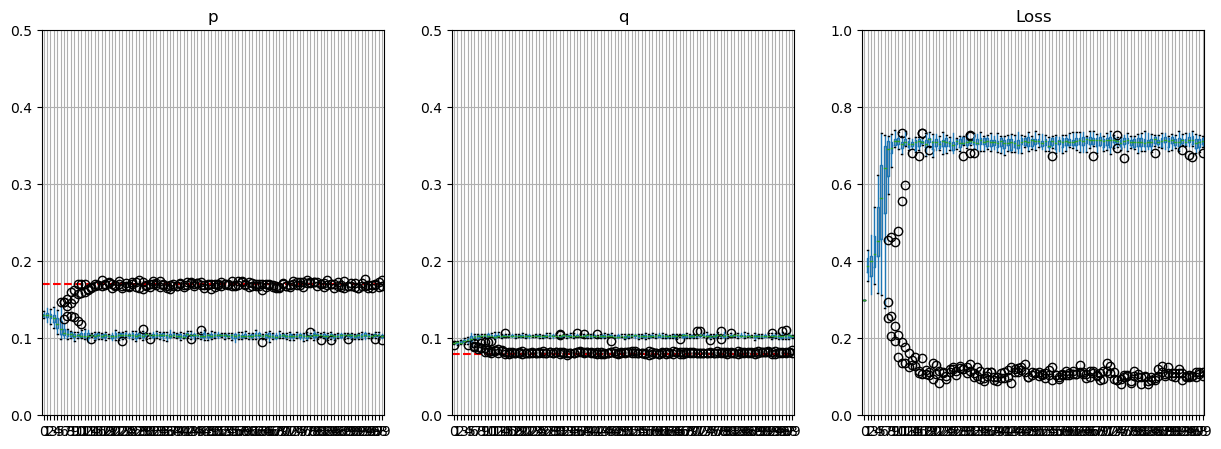

Gamma:  1


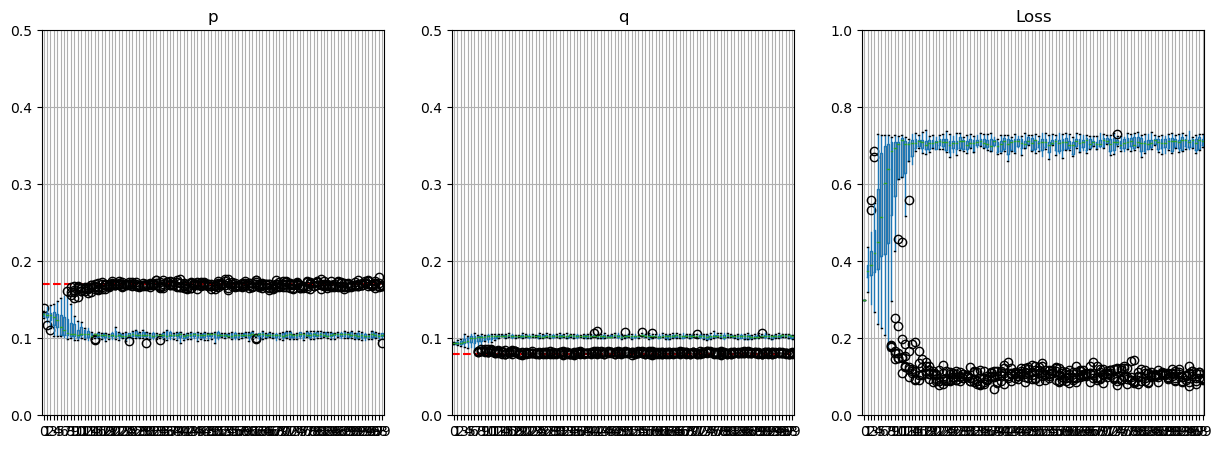

Gamma:  10


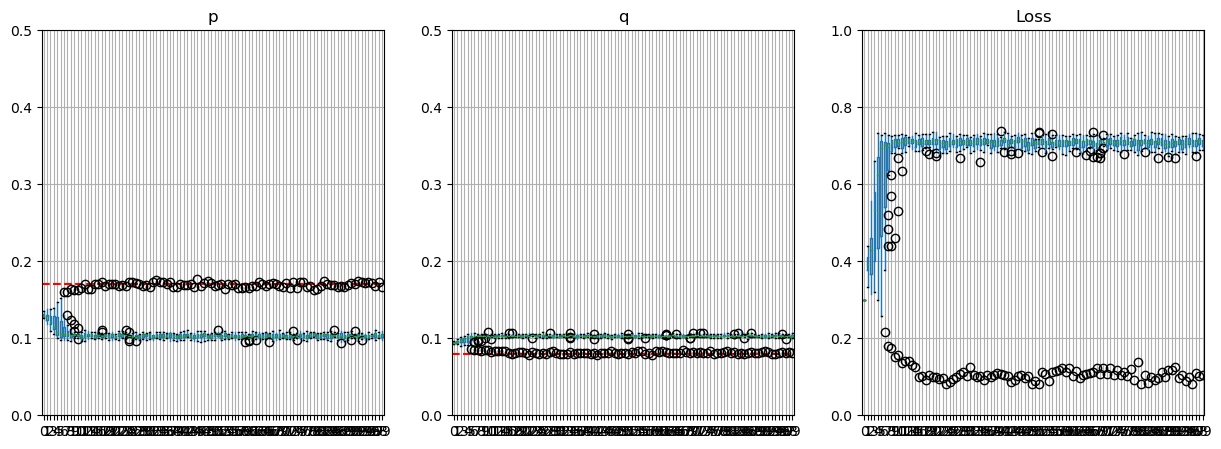

Gamma:  10000


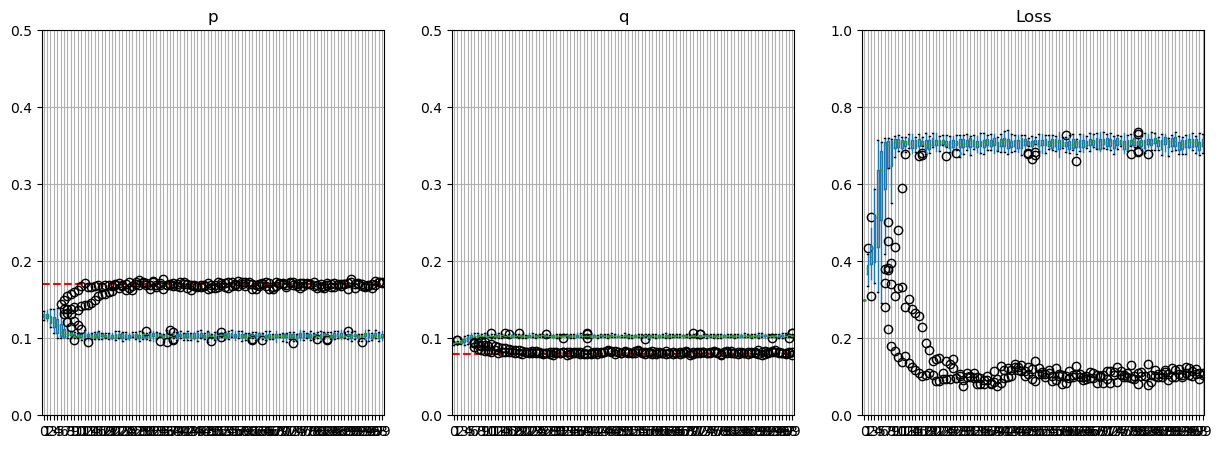

Gamma:  1000000


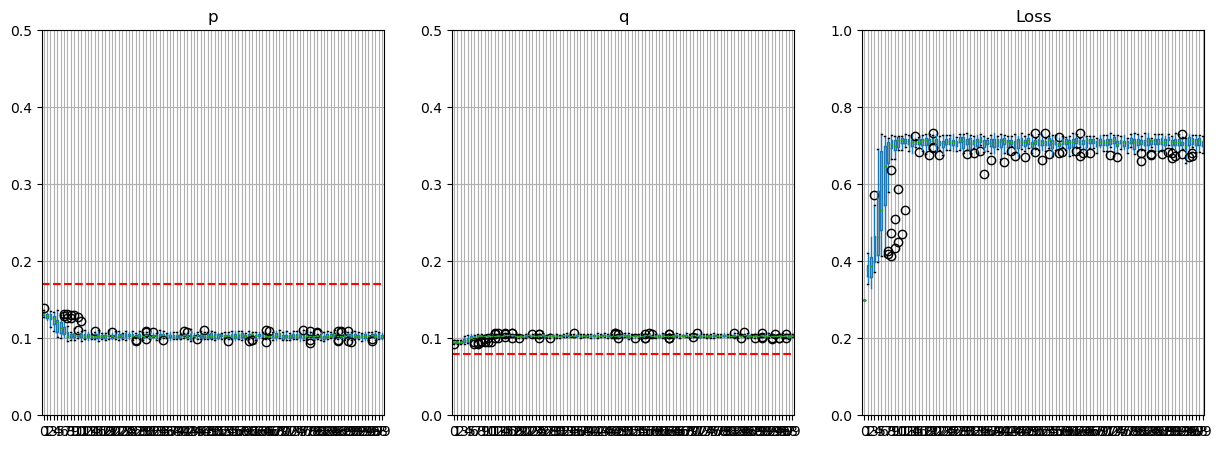

In [6]:
p_lim = 0.5
q_lim = 0.5
loss_lim = 1
pic = True


# plot the results
# deterministic prior first
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title("p")
plt.axhline(y=p, color='r', linestyle='--')
df_p = pd.DataFrame(p_list[0])
df_p.boxplot()
plt.ylim(0, p_lim)
plt.subplot(1,3,2)
plt.title("q")
plt.axhline(y=q, color='r', linestyle='--')
df_q = pd.DataFrame(q_list[0])
df_q.boxplot()
plt.ylim(0, q_lim)
plt.subplot(1,3,3)
plt.title("Loss")
df_loss = pd.DataFrame(loss_list[0])
df_loss.boxplot()
plt.ylim(0, loss_lim)
if pic: plt.savefig(f'gamma_plots/alpha_{alpha}_det_r_{N}_steps_{n_iter}.png')
plt.show()

for a, gamma in enumerate(gamma_list):
    df_p = pd.DataFrame(p_list[a+1])
    df_q = pd.DataFrame(q_list[a+1])
    df_loss = pd.DataFrame(loss_list[a+1])
    print("Gamma: ", gamma)
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.title("p")
    plt.axhline(y=p, color='r', linestyle='--')
    df_p.boxplot()
    plt.ylim(0, p_lim)
    plt.subplot(1,3,2)
    plt.title("q")
    plt.axhline(y=q, color='r', linestyle='--')
    df_q.boxplot()
    plt.ylim(0, q_lim)
    plt.subplot(1,3,3)
    plt.title("Loss")
    df_loss.boxplot()
    plt.ylim(0, loss_lim)

        
    if pic: plt.savefig(f'gamma_plots/alpha_{alpha}_gamma{gamma}_r_{N}_steps_{n_iter}.png')

    plt.show()


## Gamma in Imbalanced Communities

Gamma =  0


100%|██████████| 1000/1000 [00:09<00:00, 100.03it/s]


Gamma =  0.1


100%|██████████| 1000/1000 [00:09<00:00, 101.81it/s]


Gamma =  1


100%|██████████| 1000/1000 [00:10<00:00, 95.86it/s]


Gamma =  10


100%|██████████| 1000/1000 [00:08<00:00, 115.62it/s]


Gamma =  10000


100%|██████████| 1000/1000 [00:08<00:00, 114.70it/s]


Gamma =  1000000


100%|██████████| 1000/1000 [00:08<00:00, 116.24it/s]


Gamma:  0


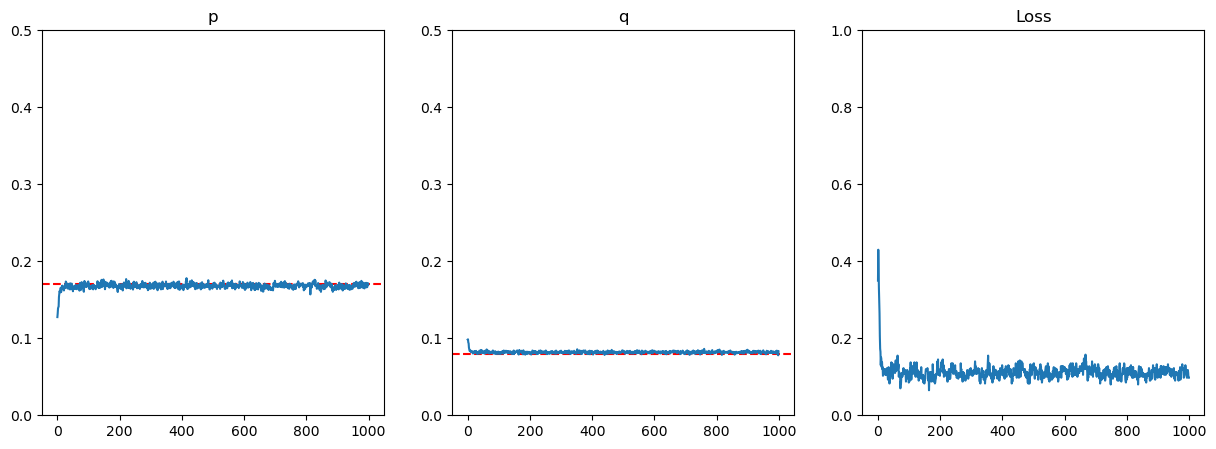

Gamma:  0.1


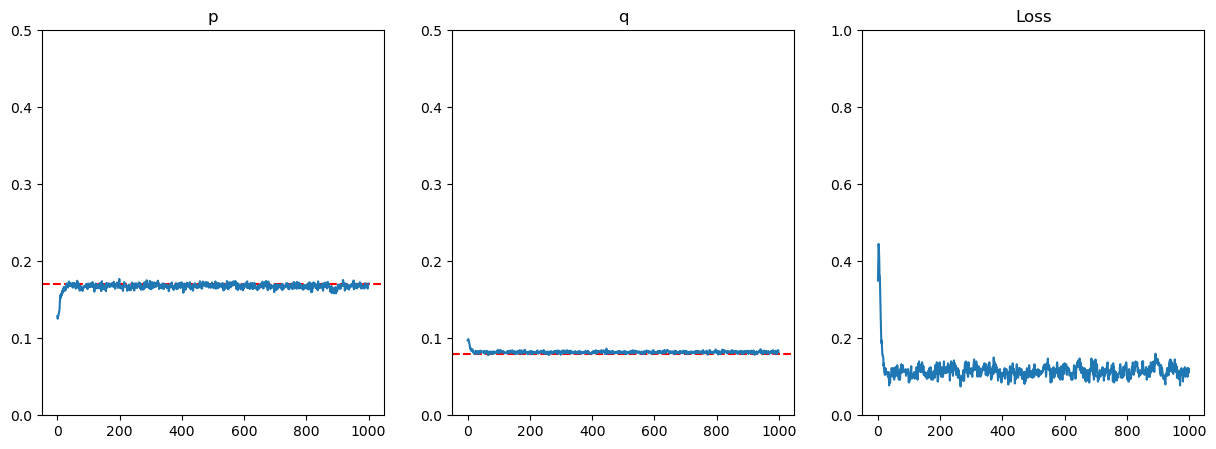

Gamma:  1


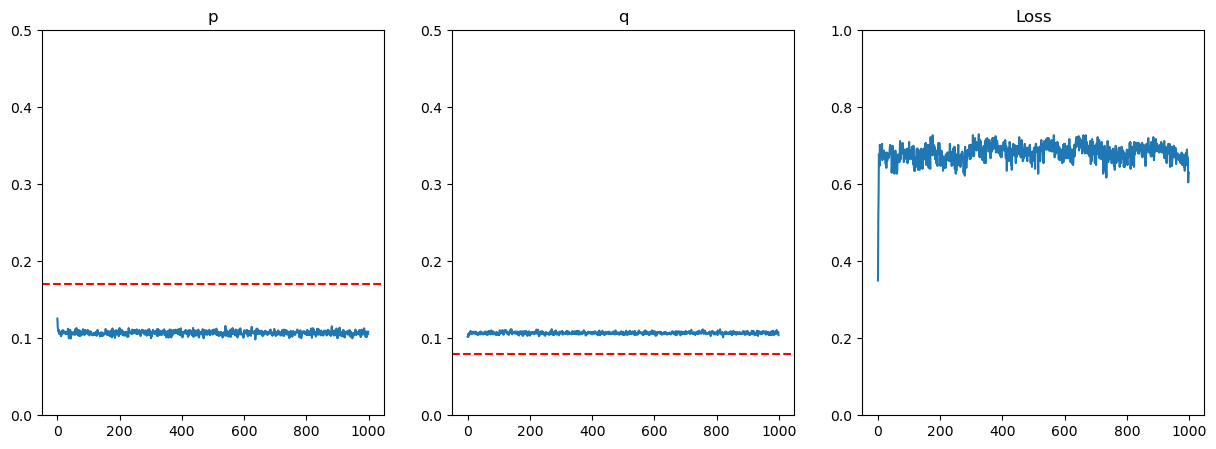

Gamma:  10


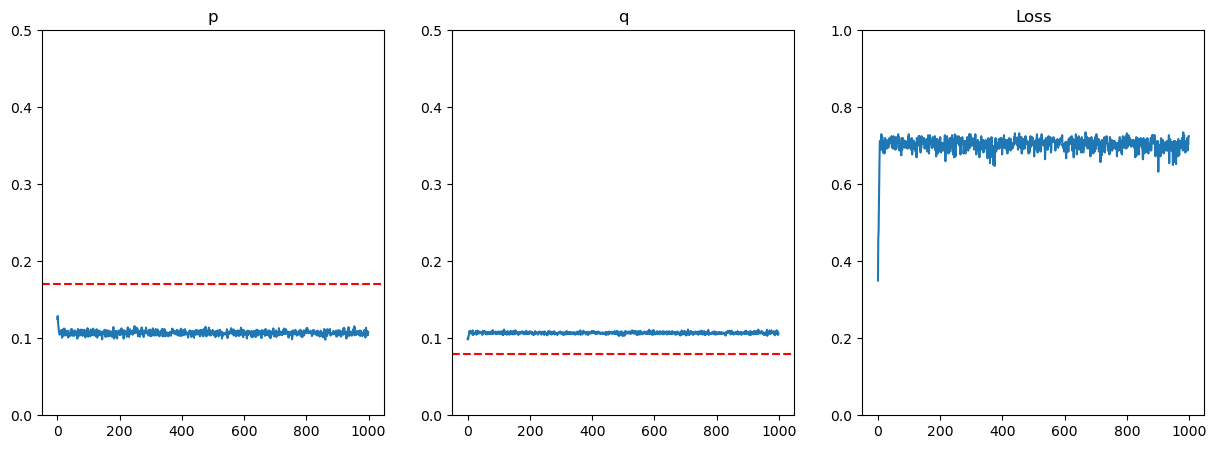

Gamma:  10000


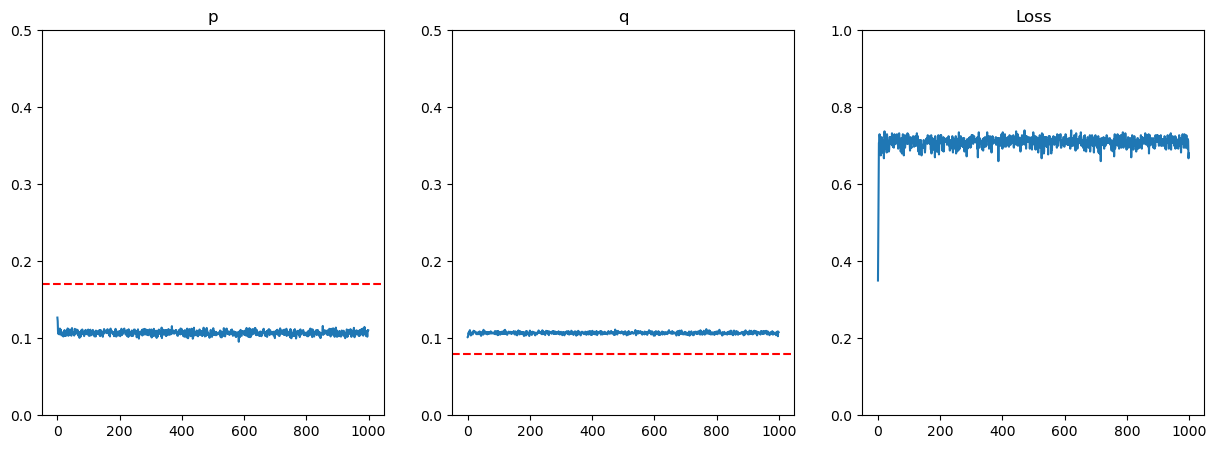

Gamma:  1000000


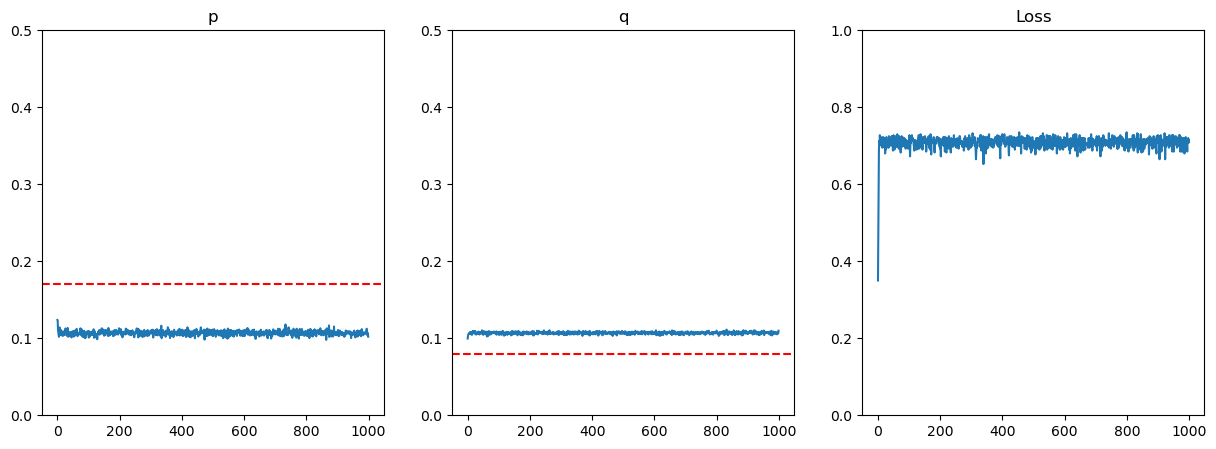

In [15]:
# set parameters
n = 400
k = 4
p = 0.17
q = 0.08
n_iter = 250
n_burnin = 0
alpha_p = 1
alpha_q = 1
beta_p = 1
beta_q = 1
gamma = 1
pi_prior = np.cumsum(np.ones(k))
pi_prior = pi_prior / np.sum(pi_prior)

alpha = 0.35 # temperature of the initialization

# set seed
np.random.seed(0)

# generate data
sbm = Homogeneous_SBM(n, k, p, q, Neal=False, pi=pi_prior)

A = sbm.get_A()
z = sbm.get_z()

# warm initialization
z_init = warm_initializer(z, alpha, n, k)

# goal: understand if gamma affects convergence in this imbalanced case
# run the samplers for different values of gamma

gamma_list = [0, 0.001, 0.1, 1, 10, 10000, 1000000]

p_list = np.zeros((len(gamma_list)+1, n_iter))
q_list = np.zeros((len(gamma_list)+1, n_iter))
loss_list =  np.zeros((len(gamma_list)+1, n_iter))

for j, gamma in enumerate(gamma_list):
    print("Gamma = ", gamma)
    sampler = Neal_batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, gamma = gamma)
    sampler.run(n_iter, n_burnin)
    z_list = sampler.get_z_list()
    losses = [loss(z, z_list[i])[0] for i in range(n_iter)]
    loss_list[j+1, :] = losses
    p_list[j+1, :] = sampler.get_p_list()
    q_list[j+1, :] = sampler.get_q_list()

# plot
p_lim = 0.5
q_lim = 0.5
loss_lim = 1
pic = False

# traceplots for each gamma, not boxplots

for a, gamma in enumerate(gamma_list):
    # three subplots horizontally
    # on the left, a traceplot of p
    # in the middle, a traceplot of q
    # on the right, a traceplot of the loss
    print("Gamma: ", gamma)
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.title("p")
    plt.axhline(y=p, color='r', linestyle='--')
    plt.plot(p_list[a+1])
    plt.ylim(0, p_lim)
    plt.subplot(1,3,2)
    plt.title("q")
    plt.axhline(y=q, color='r', linestyle='--')
    plt.plot(q_list[a+1])
    plt.ylim(0, q_lim)
    plt.subplot(1,3,3)
    plt.title("Loss")
    plt.plot(loss_list[a+1])
    plt.ylim(0, loss_lim)
    if pic: plt.savefig(f'gamma_plots/alpha_{alpha}_gamma{gamma}_r_{N}_steps_{n_iter}.png')

    plt.show()

